Archivos generados exitosamente por separado.


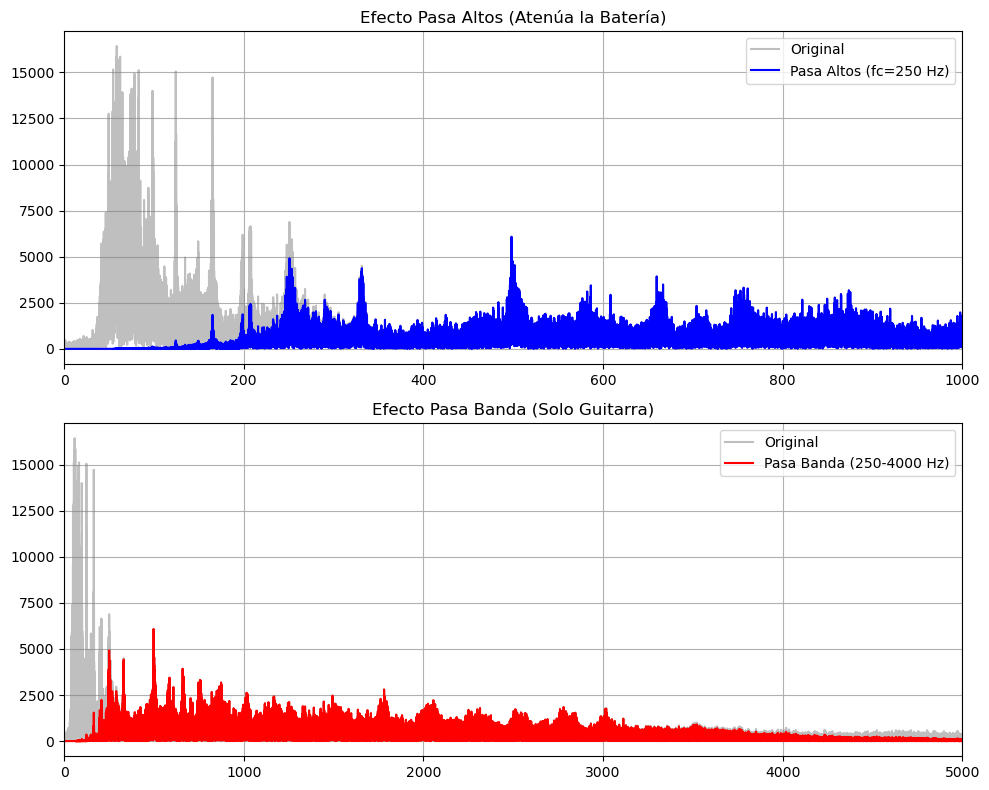

In [17]:
from scipy.io import wavfile as waves
from scipy.signal import butter, lfilter
import numpy as np
import matplotlib.pyplot as plt

#CARGAR DE ARCHIVO
filename = 'C:/Users/cabarca2/MAESTRIA_IA/P_I_S/Semana 2/TAREA/Idles.wav'
Fs, data = waves.read(filename)

# Convertir a Mono 
if len(data.shape) > 1:
    Audio_m = data[:, 0]
else:
    Audio_m = data

data_norm = Audio_m / np.max(np.abs(Audio_m))  

#FILTROS

def butter_lowpass(cutoff, fs, order=5):  # En este ejercicio no se usará, pero se deja para referencia
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Función auxiliar para aplicar cualquiera de los anteriores
def aplicar_filtro(data, b, a):
    return lfilter(b, a, data)

# EJECUCIÓN DEL PROCESO

# FILTRO PASA ALTOS (ELIMINAR BATERÍA) Quitar bombo y bajos profundos (< 250 Hz)
fc_high = 250
b_high, a_high = butter_highpass(fc_high, Fs, order=5)
audio_sin_bateria = aplicar_filtro(data_norm, b_high, a_high)

#FILTRO PASA BANDA (AISLAR GUITARRA) Mantener Guitarra (250 Hz - 4000 Hz)
low_cut = 250
high_cut = 4000
b_band, a_band = butter_bandpass(low_cut, high_cut, Fs, order=5)
audio_guitarra = aplicar_filtro(data_norm, b_band, a_band)

#GUARDAR RESULTADOS
audio_final_sin_bateria = (audio_sin_bateria * 32767).astype(np.int16)
audio_final_guitarra = (audio_guitarra * 32767).astype(np.int16)


waves.write('Idles_Sin_Bateria.wav', Fs, audio_final_sin_bateria)
waves.write('Idles_Solo_Guitarra.wav', Fs, audio_final_guitarra)

print("Archivos generados exitosamente por separado.")

#GRAFICAR
plt.figure(figsize=(10, 8))
L = len(data_norm)
frecuencias = np.fft.fftfreq(L, 1/Fs)[:L//2]

# FFT Original
fft_orig = np.abs(np.fft.fft(data_norm))[:L//2]
# FFT Sin Batería
fft_sb = np.abs(np.fft.fft(audio_sin_bateria))[:L//2]
# FFT Guitarra
fft_guit = np.abs(np.fft.fft(audio_guitarra))[:L//2]

# Gráfica 1: Pasa Altos
plt.subplot(2, 1, 1)
plt.plot(frecuencias, fft_orig, color='gray', alpha=0.5, label='Original')
plt.plot(frecuencias, fft_sb, color='blue', label=f'Pasa Altos (fc={fc_high} Hz)')
plt.xlim(0, 1000)
plt.title("Efecto Pasa Altos (Atenúa la Batería)")
plt.legend()
plt.grid()

# Gráfica 2: Pasa Banda
plt.subplot(2, 1, 2)
plt.plot(frecuencias, fft_orig, color='gray', alpha=0.5, label='Original')
plt.plot(frecuencias, fft_guit, color='red', label=f'Pasa Banda ({low_cut}-{high_cut} Hz)')
plt.xlim(0, 5000)
plt.title("Efecto Pasa Banda (Solo Guitarra)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()